In [17]:
from pydub import AudioSegment
from pydub.playback import play
from pydub.silence import split_on_silence
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import os

sample_path = os.path.join('data', 'vocais', 'eu-nao-te-amo-don-l.mp3.wav')

sample = AudioSegment.from_wav(sample_path)

# get raw audio data as a bytestring
raw_data = sample.raw_data

# get the frame rate
sample_rate = sample.frame_rate

# get amount of bytes contained in one sample
sample_size = sample.sample_width

# get channels
channels = sample.channels

print('frame_rate = {}\nsample_width = {}\n# of channels = {}'.format(sample_rate, sample_size, channels))

frame_rate = 44100
sample_width = 2
# of channels = 2


amplitudes.shape = (12847151,)
tempo da música 4.855310279667423


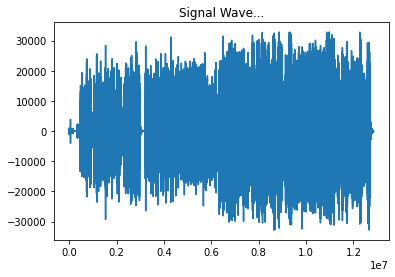

In [12]:
#plot
channels_audios = sample.split_to_mono() # retorna arary com 2 canais
# play(channels_audios[0])
amplitudes = np.array(channels_audios[0].get_array_of_samples())
tempo_musica = amplitudes.shape[0] / sample_rate
print("amplitudes.shape = {}".format(amplitudes.shape))
print("tempo da música", tempo_musica / 60 ) # tempo da música em minutos

def plot_amplitudes(amplitudes):
    plt.figure(1)
    plt.title("Signal Wave...")
    plt.plot(amplitudes)
    plt.show()
    
plot_amplitudes(amplitudes)

In [15]:
def slice_amplitudes(amplitudes, start, end, frame_rate):
    return amplitudes[start*sample_rate:end*sample_rate]

slice_vocais = slice_amplitudes(amplitudes, 10, 20, sample_rate)
print(slice_vocais.shape)

(441000,)


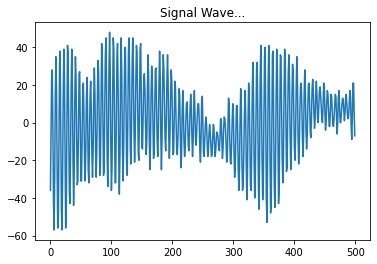

In [24]:
faixa = sample[10000:20000].split_to_mono()[0]
amplitudes_faixa = np.array(faixa.get_array_of_samples())
plot_amplitudes(amplitudes_faixa[0:500])

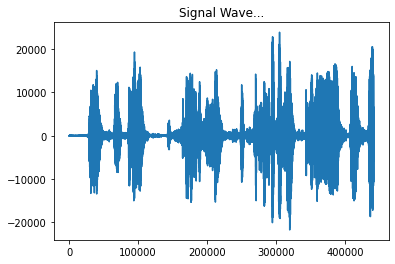

In [16]:
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(slice_vocais)
plt.show()

In [33]:
audio_chunks = split_on_silence(faixa, 
    # must be silent for at least half a second
    min_silence_len=5,

    # consider it silent if quieter than -16 dBFS
    silence_thresh=-16
)
for i, chunk in enumerate(audio_chunks):

    out_file = "chunk{0}.wav".format(i)
    chunk.export(out_file, format="wav")